## Fase 2: Transformación de los datos.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df_transformacion= pd.read_csv("HR_01.csv", index_col = None)
df_transformacion_copy = df_transformacion.copy()

In [45]:
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


### **A. MODIFICACIÓN DE TIPO DE DATO**

**A.1. TRANSFORMACIONES EN TIPOS DE DATOS POR VARIABLES**

In [67]:
df_transformacion_copy.dtypes

age                            object
attrition                      object
business_travel                object
daily_rate                     object
department                     object
distance_from_home              int64
education                       int64
education_field                object
employee_count                  int64
employee_number                object
environment_satisfaction        int64
gender                          int64
hourly_rate                    object
job_involvement                 int64
job_level                       int64
job_role                       object
job_satisfaction                int64
marital_status                 object
monthly_income                 object
monthly_rate                    int64
num_companies_worked            int64
over18                         object
over_time                      object
percent_salary_hike             int64
performance_rating             object
relationship_satisfaction       int64
standard_hou

In [3]:
# Entero a float : monthly_rate

df_transformacion_copy["monthly_rate"]=df_transformacion_copy["monthly_rate"].astype(float)
df_transformacion_copy["monthly_rate"].dtypes

dtype('float64')

In [4]:
# Entero a object : gender
df_transformacion_copy["gender"]=df_transformacion_copy["gender"].astype(object)
df_transformacion_copy["gender"].dtypes


dtype('O')

In [5]:
# Object quitar caracter especial "$": "daily_rate" "salary"

columnas1 = ["daily_rate","salary"]

def cambiar_simbolo(columnas): 
    try:
        return columnas.str.replace("$","")
    except:
        return np.nan

for columna in columnas1:
    df_transformacion_copy[columna] = cambiar_simbolo(df_transformacion_copy[columna])

df_transformacion_copy.head()




,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,"684,0",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462.0,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000,NaN,NaN,Yes
1,52,No,NaN,"699,0",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678.0,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000,NaN,NaN,1
2,42,No,travel_rarely,"532,0",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933.0,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703.0,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000,NaN,NaN,False
4,46,No,NaN,"1319,0",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739.0,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000,NaN,NaN,0


In [6]:
# Object a float :"hourly_rate","monthly_income","standard_hours"

columnas_a_float = ["daily_rate","hourly_rate","monthly_income","standard_hours","salary"]

def cambiar_object_float(columnas):
    try:
        return columnas.str.replace(',', '.').astype(float)
    except:
        return np.nan

for columna in columnas_a_float:
    df_transformacion_copy[columna] = cambiar_object_float(df_transformacion_copy[columna])


df_transformacion_copy[columnas_a_float].dtypes



daily_rate        float64
hourly_rate       float64
monthly_income    float64
standard_hours    float64
salary            float64
dtype: object

In [50]:
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,684.0,NaN,6,3,NaN,1,"162,0",1,0,NaN,3,5,resEArch DIREcToR,3,NaN,19537.0,6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,NaN,699.0,NaN,1,4,Life Sciences,1,"259,0",3,0,NaN,2,5,ManAGeR,3,NaN,19999.0,5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,1
2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,1,"319,0",3,0,NaN,3,5,ManaGER,4,Married,19232.0,4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1.000000e+09,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,359.0,NaN,2,4,Medical,1,NaN,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,17169.0,26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1.000000e+09,NaN,NaN,False
4,46,No,NaN,1319.0,NaN,3,3,Technical Degree,1,NaN,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1.000000e+09,NaN,NaN,0


**A.2. HOMOGENEIZACIÓN DATOS**

In [51]:
# Comprobar los valores únicos de las variables "age", "remote_work", "over18"

print(f'Analizar los valores únicos de las variables:\n-Variable "age":\n{df_transformacion_copy["age"].unique()}\n-Variable "remote_work":\n{df_transformacion_copy["remote_work"].unique()}\n-Variable "over18":\n{df_transformacion_copy["over18"].unique()}')

Analizar los valores únicos de las variables:
-Variable "age":
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
-Variable "remote_work":
['Yes' '1' 'False' '0' 'True']
-Variable "over18":
['Y' nan]


In [7]:
# Reemplazar los valores para su homogeneización:

dicc_age = {"forty-seven": "47", "fifty-eight": "58", "thirty-six": "36", "fifty-five": "55", "fifty-two": "52", "thirty-one": "31", "thirty": "30", "twenty-six": "26", "thirty-seven": "37", "thirty-two": "32", "twenty-four": "24"}

dicc_remote = {"0": "No", "1": "Yes", "True":"Yes", "False": "No"}

dicc_over18 = {"Y": "Yes"}

def reemplazar_datos(df_transformacion_copy):
    
    df_transformacion_copy["age"] = df_transformacion_copy["age"].replace(dicc_age)

 
    df_transformacion_copy["remote_work"] = df_transformacion_copy["remote_work"].replace(dicc_remote)

 
    df_transformacion_copy["over18"] = df_transformacion_copy["over18"].replace(dicc_over18)

    return df_transformacion_copy

df_transformacion_copy = reemplazar_datos(df_transformacion_copy)

In [8]:
# Comprobar los valores únicos de las variables "age", "remote_work", "over18" después del reemplazo

print(f'Comprobación de la homogeneización de los valores depués del reemplazo:\n-Variable "age":\n{df_transformacion_copy["age"].unique()}\n-Variable "remote_work":\n{df_transformacion_copy["remote_work"].unique()}\n-Variable "over18":\n{df_transformacion_copy["over18"].unique()}')

Comprobación de la homogeneización de los valores depués del reemplazo:
-Variable "age":
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' '53' '43' '60' '32' '37' '49' '39' '50' '44' '30'
 '29' '31' '54' '57' '27' '28' '26' '25' '24' '23' '22' '21' '20' '19'
 '18']
-Variable "remote_work":
['Yes' 'No']
-Variable "over18":
['Yes' nan]


In [54]:
df_transformacion_copy.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,684.0,NaN,6,3,NaN,1,"162,0",1,0,NaN,3,5,resEArch DIREcToR,3,NaN,19537.0,6462,7,Yes,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,NaN,699.0,NaN,1,4,Life Sciences,1,"259,0",3,0,NaN,2,5,ManAGeR,3,NaN,19999.0,5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,Yes


In [9]:
# Cambio de categóricos 

categoricas = ["age","employee_number", "performance_rating", "total_working_years", "work_life_balance", "years_in_current_role"]
df_transformacion_copy[categoricas].dtypes

age                      object
employee_number          object
performance_rating       object
total_working_years      object
work_life_balance        object
years_in_current_role    object
dtype: object

In [10]:
def cambiar_comas_obj(columnas):
    try:
        return columnas.str.replace(',', '.')
    except:
        return np.nan

for columna in categoricas:
    df_transformacion_copy[columna] = cambiar_comas_obj(df_transformacion_copy[columna])


df_transformacion_copy[categoricas].dtypes


age                      object
employee_number          object
performance_rating       object
total_working_years      object
work_life_balance        object
years_in_current_role    object
dtype: object

In [11]:
# Convertir age a int
df_transformacion_copy['age'] = df_transformacion_copy['age'].astype(int)

# Convertir categoricas con nulos a float

categoricas1 = ["employee_number", "performance_rating", "total_working_years", "work_life_balance", "years_in_current_role"]

df_transformacion_copy[categoricas1] = df_transformacion_copy[categoricas1].astype(float)


# Visualizamos los primeros registros
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,684.0,NaN,6,3,NaN,1,162.0,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,19537.0,6462.0,7,Yes,No,13,3.0,3,NaN,0,NaN,5,3.0,20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,NaN,699.0,NaN,1,4,Life Sciences,1,259.0,3,0,NaN,2,5,ManAGeR,3,NaN,19999.0,5678.0,0,NaN,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,Yes
2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,0,NaN,3,5,ManaGER,4,Married,19232.0,4933.0,1,NaN,No,11,3.0,4,NaN,0,22.0,3,NaN,22,NaN,11,15,"19232,0",1981,1.000000e+09,ManaGER - Research & Development,NaN,Yes
3,47,No,travel_rarely,359.0,NaN,2,4,Medical,1,NaN,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,17169.0,26703.0,3,Yes,NaN,19,3.0,2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1.000000e+09,NaN,NaN,No
4,46,No,NaN,1319.0,NaN,3,3,Technical Degree,1,NaN,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739.0,2,Yes,No,12,3.0,4,NaN,1,NaN,5,3.0,19,NaN,2,8,NaN,1977,1.000000e+09,NaN,NaN,No


In [13]:
#Comprobación
df_transformacion_copy[categoricas].dtypes

age                        int64
employee_number          float64
performance_rating       float64
total_working_years      float64
work_life_balance        float64
years_in_current_role    float64
dtype: object

**A.3. ELIMINACIÓN CARACTERES ESPECIALES**

In [14]:
df_transformacion_copy1 = df_transformacion_copy.copy()

In [15]:
print('Valores unicos de business_travel',df_transformacion_copy["business_travel"].unique())
print('Total nulos de business_travel',df_transformacion_copy1["business_travel"].isnull().sum())

Valores unicos de business_travel [nan 'travel_rarely' 'travel_frequently' 'non-travel']
Total nulos de business_travel 772


In [16]:

distribucion_nulos= display(df_transformacion_copy1["business_travel"].value_counts() / df_transformacion_copy.shape[0]) 


business_travel
travel_rarely        0.363073
travel_frequently    0.102230
non-travel           0.056382
Name: count, dtype: float64

En bussines travel no hay ningún valor dominante por lo que se usará 'Unknown' para gestionar los nulos

In [17]:
df_transformacion_copy1["business_travel"] = df_transformacion_copy1["business_travel"].fillna("Unknown")


print("Total nulos:",df_transformacion_copy1["business_travel"].isnull().sum())
print('Valores unicos de business_travel',df_transformacion_copy1["business_travel"].unique())


Total nulos: 0
Valores unicos de business_travel ['Unknown' 'travel_rarely' 'travel_frequently' 'non-travel']


In [18]:
# Caracteres especiales datos business_travel

# Homogeneización de datos quitamos "-" y "_"

df_transformacion_copy1['business_travel'] = df_transformacion_copy1['business_travel'].str.replace(r'[-_]', ' ', regex=True)

# Visualizamos los primeros registros
df_transformacion_copy1.head()



,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_departament,number_children,remote_work
0,51,No,Unknown,684.0,NaN,6,3,NaN,1,162.0,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,19537.0,6462.0,7,Yes,No,13,3.0,3,NaN,0,NaN,5,3.0,20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,Unknown,699.0,NaN,1,4,Life Sciences,1,259.0,3,0,NaN,2,5,ManAGeR,3,NaN,19999.0,5678.0,0,NaN,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,0,NaN,3,5,ManaGER,4,Married,19232.0,4933.0,1,NaN,No,11,3.0,4,NaN,0,22.0,3,NaN,22,NaN,11,15,"19232,0",1981,1.000000e+09,ManaGER - Research & Development,NaN,Yes
3,47,No,travel rarely,359.0,NaN,2,4,Medical,1,NaN,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,17169.0,26703.0,3,Yes,NaN,19,3.0,2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1.000000e+09,NaN,NaN,No
4,46,No,Unknown,1319.0,NaN,3,3,Technical Degree,1,NaN,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739.0,2,Yes,No,12,3.0,4,NaN,1,NaN,5,3.0,19,NaN,2,8,NaN,1977,1.000000e+09,NaN,NaN,No


### **B. IMPUTACIÓN DE NULOS**

Imputacion nulos de daily rate

In [19]:
print('Valores unicos de daily_rate',df_transformacion_copy["daily_rate"].unique())
print('Total nulos de daily_rate',df_transformacion_copy1["daily_rate"].isnull().sum())
print('Tipo de dato daily_rate',df_transformacion_copy1["daily_rate"].dtypes)

Valores unicos de daily_rate [ 684.  699.  532.  359. 1319.  117. 1435.  635. 1276.  840.  247. 1369.
  201. 1360.  692. 1398.  286. 1402.  819.  884. 1238.  515. 1223.  202.
  928.  607.  266.  429.  589.   nan 1180. 1282.  776.  665.  526. 1034.
 1403. 1499.  580.  859.  263. 1376.  885. 1003. 1321.  394. 1372. 1333.
  228.  737.  823.  667.  301.  573. 1329.  630. 1063. 1017. 1296.  939.
 1355. 1448.  200. 1202.  404.  208.  813.  465. 1189. 1001. 1394.  161.
  288.  682. 1354.  147.  119. 1413.  452.  334. 1132.  982.  480. 1099.
  672. 1379.  583. 1492. 1050.  469.  237. 1440. 1291. 1157. 1336. 1224.
  735. 1389.  638. 1240.  194. 1339.  111. 1469.  470. 1232. 1249.  798.
  549.  570.  541.  164. 1117.  619.  319.  956. 1245. 1397.  527.  213.
  882.  330.  406.  217.  481.  669. 1465.  685. 1062.  177. 1199.  648.
  412.  282.  770.  601.  855.  332. 1326.  748.  405.  790.  971. 1370.
  750.  880.  678. 1179.  350. 1266.  574.  189.  310.  722. 1219.  994.
  721.  853.  427.  85

**B.1. VARIABLES NUMÉRICAS CON NULOS**

In [20]:
# Lista de columnas numericas que tienen nulos
nulos_num = df_transformacion_copy1[df_transformacion_copy1.columns[df_transformacion_copy1.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['daily_rate', 'employee_number', 'hourly_rate', 'monthly_income',
       'performance_rating', 'standard_hours', 'total_working_years',
       'work_life_balance', 'years_in_current_role', 'number_children'],
      dtype='object')


Analisis:
- `hourly_rate`: no tiene datos se puede sacar dividiendo monthly income con numero de horas al mes

In [21]:
#Nulos variables numéricas
df_nulos_numerico= pd.DataFrame((df_transformacion_copy1[nulos_num].isnull().sum() / df_transformacion_copy1[nulos_num].shape[0]) * 100, columns = ["%_nulos"])
df_nulos_numerico

,%_nulos
daily_rate,7.682776
employee_number,26.703841
hourly_rate,100.000000
monthly_income,52.230483
performance_rating,12.081784
standard_hours,74.039653
total_working_years,32.589839
work_life_balance,6.691450
years_in_current_role,97.893432
number_children,100.000000


In [22]:
num_con_valores=["daily_rate", 'employee_number', 'monthly_income',
       'performance_rating', 'standard_hours', 'total_working_years',
       'work_life_balance', 'years_in_current_role']

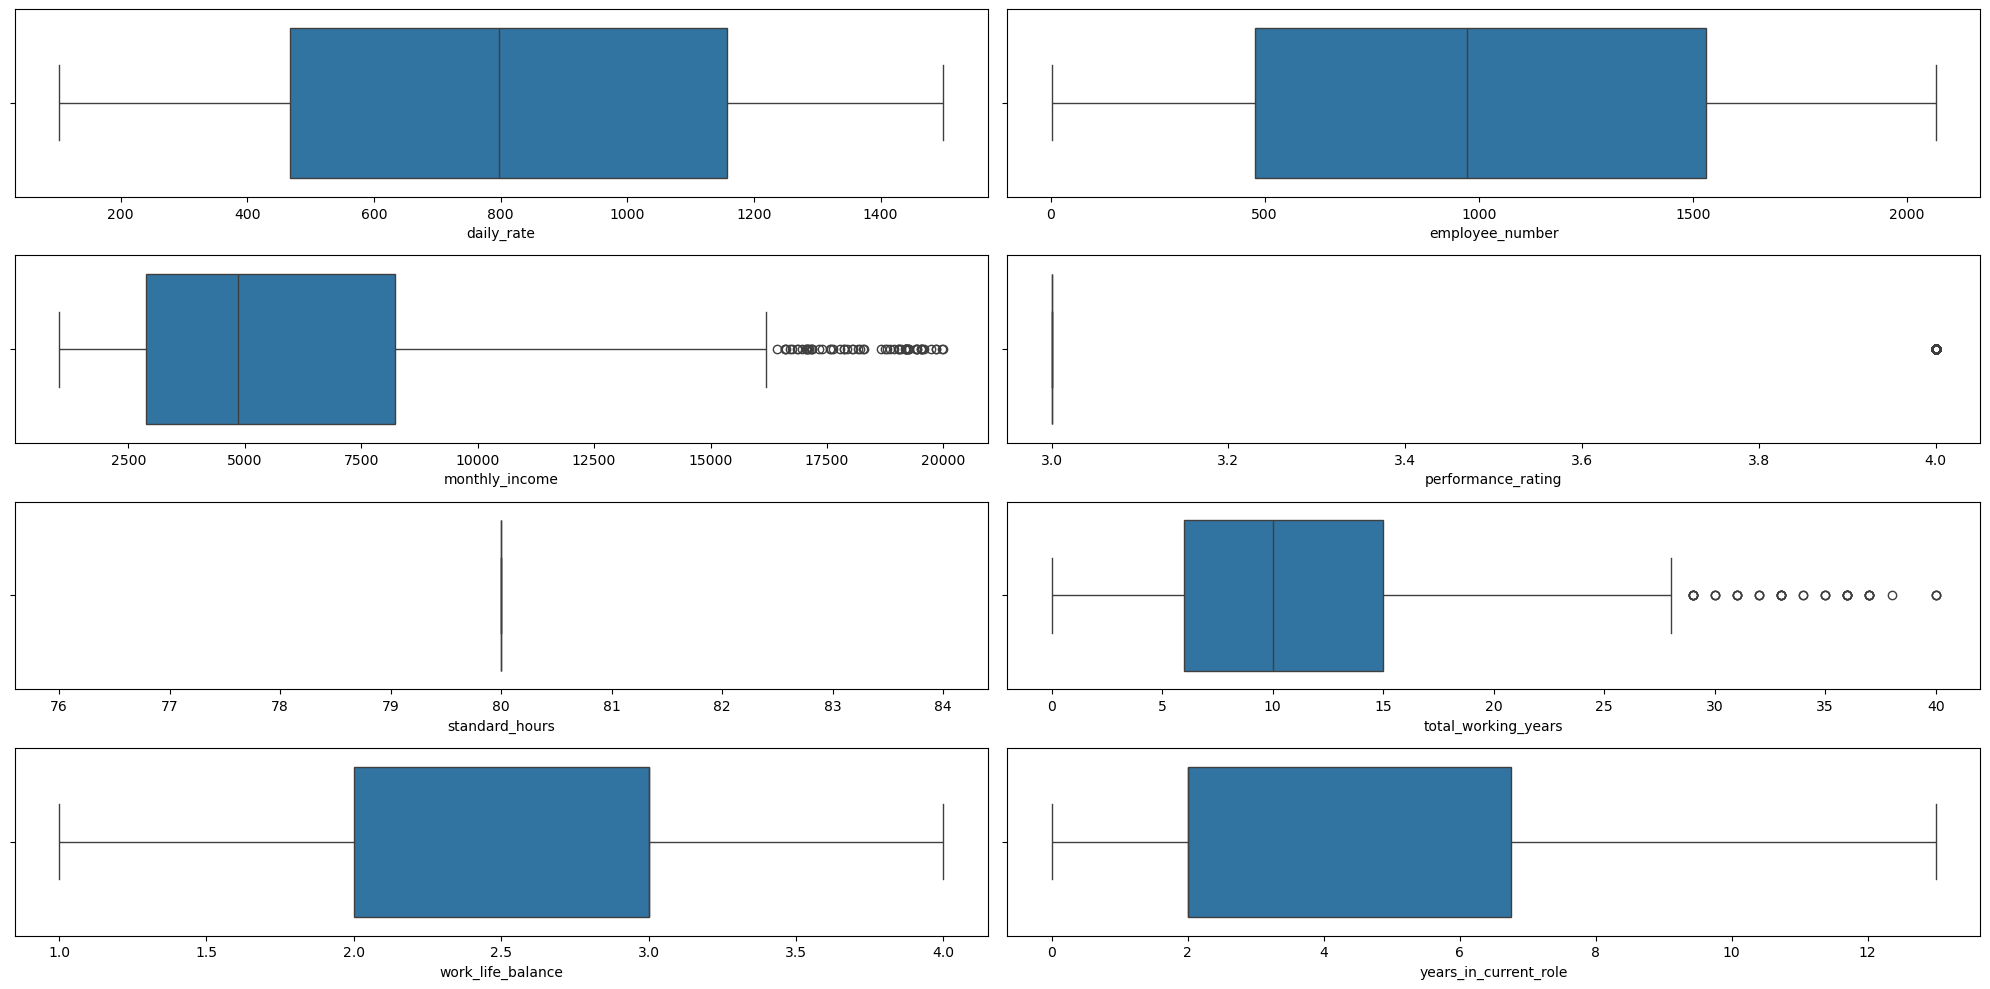

In [23]:
#Valores atipicos o outliers

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(num_con_valores):
    sns.boxplot(x = col, data =df_transformacion_copy1, ax = axes[indice])
    
plt.tight_layout();

**Análisis**

`Daily rate, employee_number, years_in_current_role, work_life_balance`: no tienen outliers, se pueden gestionar con la media o mediana. Para seleccionar el método más eficiente es necesario analizar porcentaje de nulos. 

`Daily rate`: tiene 7.6% de nulos y no tiene outliers así que obtaremos por la media

B.1.1 DAILY RATE

In [40]:
# Calculo de la media
media_daily_rate= df_transformacion_copy1["daily_rate"].mean()
print(f"La media de la columna 'daily_rate' es: {round(media_daily_rate, 2)}")

# aplicamos el método 'fillna()' a la columna
df_transformacion_copy1["daily_rate"] = df_transformacion_copy1["daily_rate"].fillna(media_daily_rate)

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df_transformacion_copy1["daily_rate"].isnull().sum()} nulos")


La media de la columna 'daily_rate' es: 802.09
Después del 'fillna' tenemos 0 nulos


B.1.2 STANDAR HOURS

In [66]:
print('Valores unicos de standar_hours',df_transformacion_copy1["standard_hours"].unique())
print('----------------')
print('Total nulos de standar_hours',df_transformacion_copy1["standard_hours"].isnull().sum())
print('----------------')
print('Tipo de dato standar_hours',df_transformacion_copy1["standard_hours"].dtypes)

Valores unicos de standar_hours [nan 80.]
----------------
Total nulos de standar_hours 1195
----------------
Tipo de dato standar_hours float64


Tiene solo dos valores unicos [nan 80.]. Aunque tiene un porcentaje alto de nulos 	74.0%. 

- Analizar si se puede complementar con otra columna
- Posibilidad de ser eliminada
- Utilizar método de predicción avanzado

B.1.3 EMPLOYEE NUMBER

In [39]:
df_transformacion_copy1["employee_number"].value_counts() 


employee_number
482.0     2
530.0     2
507.0     2
517.0     2
522.0     2
523.0     2
525.0     2
526.0     2
544.0     2
501.0     2
725.0     2
724.0     2
722.0     2
721.0     2
717.0     2
710.0     2
502.0     2
495.0     2
747.0     2
440.0     2
734.0     2
733.0     2
728.0     2
423.0     2
424.0     2
433.0     2
447.0     2
1140.0    2
455.0     2
460.0     2
465.0     2
470.0     2
475.0     2
478.0     2
682.0     2
663.0     2
653.0     2
1069.0    2
389.0     2
388.0     2
381.0     2
376.0     2
1044.0    2
1053.0    2
1195.0    2
621.0     2
1185.0    2
1162.0    2
1161.0    2
1160.0    2
1157.0    2
1131.0    2
401.0     2
416.0     2
430.0     2
438.0     2
446.0     2
448.0     2
454.0     2
458.0     2
476.0     2
483.0     2
488.0     2
500.0     2
534.0     2
586.0     2
595.0     2
608.0     2
616.0     2
742.0     2
1135.0    2
762.0     2
1849.0    2
972.0     2
990.0     2
1927.0    2
1911.0    2
1898.0    2
1869.0    2
1821.0    2
966.0     2
1816.0    2


Employee number: Algunos parecen duplicados, 

In [ ]:
print('----------------')
print('Total nulos de employee_number',df_transformacion_copy1["employee_number"].isnull().sum())
print('----------------')
print('Tipo de dato employee_number',df_transformacion_copy1["employee_number"].dtypes)